In [1]:
from pandas import read_csv
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from math import sqrt
import numpy
import matplotlib.pyplot as plt

In [2]:
df_new = read_csv("new_Basetrain.csv") 
numpy.random.seed(7)

In [3]:
x_base = df_new.drop(['SalePriceLog'], axis=1)
dataset = x_base.values
dataset = dataset.astype('float32')

In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

973 480


In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Train on 971 samples
Epoch 1/200
971/971 - 3s - loss: 74537.9863
Epoch 2/200
971/971 - 1s - loss: 31.4972
Epoch 3/200
971/971 - 1s - loss: 0.0081
Epoch 4/200
971/971 - 1s - loss: 0.0080
Epoch 5/200
971/971 - 1s - loss: 0.0080
Epoch 6/200
971/971 - 1s - loss: 0.0080
Epoch 7/200
971/971 - 1s - loss: 0.0079
Epoch 8/200
971/971 - 1s - loss: 0.0078
Epoch 9/200
971/971 - 1s - loss: 0.0078
Epoch 10/200
971/971 - 1s - loss: 0.0076
Epoch 11/200
971/971 - 1s - loss: 0.0075
Epoch 12/200
971/971 - 1s - loss: 0.0073
Epoch 13/200
971/971 - 1s - loss: 0.0072
Epoch 14/200
971/971 - 1s - loss: 0.0070
Epoch 15/200
971/971 - 1s - loss: 0.0068
Epoch 16/200
971/971 - 1s - loss: 0.0070
Epoch 17/200
971/971 - 1s - loss: 0.0067
Epoch 18/200
971/971 - 1s - loss: 0.0067
Epoch 19/200
971/971 - 1s - loss: 0.0064
Epoch 20/200
971/971 - 1s - loss: 0.0068
Epoch 21/200
971/971 - 1s - loss: 0.0071
Epoch 22/200
971/971 - 1s - loss: 0.0086
Epoch 23/200
971/971 - 1s - loss: 0.0097
Epoch 24/200
971/971 - 1s - loss: 0.0159

971/971 - 1s - loss: 0.0111
Epoch 199/200
971/971 - 1s - loss: 0.4757
Epoch 200/200
971/971 - 1s - loss: 0.0134


In [8]:
trainScore = model.evaluate(trainX, trainY, verbose=2)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=2)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, sqrt(testScore)))

971/1 - 0s - loss: 0.0157
Train Score: 0.01 MSE (0.11 RMSE)
478/1 - 0s - loss: 0.0371
Test Score: 0.03 MSE (0.18 RMSE)


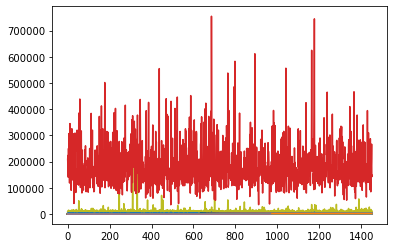

In [9]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()